# Construction Cash Flow Optimization

### Importing Packages

In [13]:
import logging
import numpy as np
import matplotlib.pyplot as plt

### Configuration

In [14]:
logging.basicConfig(
    level=logging.INFO,
    format='[%(asctime)s]%(levelname)s: %(message)s',
    datefmt='%H:%M:%S'
)

### Initiate a project

In [15]:
class Project: pass  # Create a blank class
project = Project()  # Initiate a blank project object
project.start = np.datetime64("2019-01-01")
project.number_of_activities = 20
project.dur = np.zeros(project.number_of_activities)  # duration

### Randomize the project

In [16]:
# Randomize the durations, costs, and preds
project.dur = np.array([np.timedelta64(np.random.randint(1, 10), 'D') for i in range(project.number_of_activities)])
project.cost = np.random.randint(1, 10, size=(project.number_of_activities))
project.pred = [
    [i - np.random.randint(1, i), ] if i > 1 else [] 
    for i in range(project.number_of_activities)
]

## Calculate the project

In [17]:
# Initiate ES and EF
project.es = np.array([project.start for i in range(project.number_of_activities)])
project.ef = project.es + project.dur
# Perform Front Run
logging.info("Starting the Front Run...")
cond = True
while cond:
    cond = False
    for i in range(project.number_of_activities):
        for pred in project.pred[i]:
            if project.es[i] < project.ef[pred]:
                project.es[i] = project.ef[pred]
                project.ef[i] = project.es[i] + project.dur[i]
                cond = True
del cond
# Record the project finish
project.finish = project.ef.max()
# Perform the Back Run
logging.info("Starting the Back Run...")
# Intiate the LS and LF
project.lf = np.array([project.finish for i in range(project.number_of_activities)])
project.ls = project.lf - project.dur
cond = True
while cond:
    cond = False
    for i in range(project.number_of_activities):
        for pred in project.pred[i]:
            if project.lf[pred] > project.ls[i]:
                project.lf[pred] = project.ls[i]
                project.ls[pred] = project.lf[pred] - project.dur[pred]
                cond = True
del cond

[16:22:49]INFO: Starting the Front Run...
[16:22:49]INFO: Starting the Back Run...


In [18]:
print(project.ls-project.es)

[27  0  0 16 15  0 15 16 15 15 16  0 15 19  0 23 15  0 15 25]


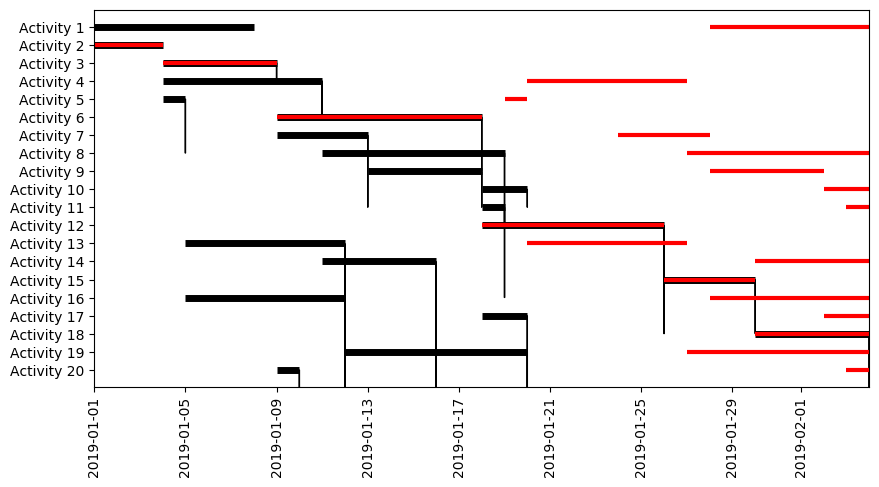

In [40]:
plt.figure(figsize=(10 , 5), dpi=100)
# Draw Activities
plt.hlines(
    y = ["Activity {}".format(i+1) for i in range(project.number_of_activities)],
    xmin=project.es,
    xmax=project.ef,
    linewidth=5
)
# Draw Late
plt.hlines(
    y = ["Activity {}".format(i+1) for i in range(project.number_of_activities)],
    xmin=project.ls,
    xmax=project.lf,
    linewidth=3,
    color="red"
)
# Draw Arrow
for i in range(project.number_of_activities):
    for pred in project.pred[i]:
        plt.arrow(
            x=project.ef[i],
            y=i,
            dx=(project.ef[pred]-project.es[i]).astype('timedelta64[D]')/np.timedelta64(1,"D"),
            dy=i-pred,
        )
plt.xlim(project.start, project.finish)
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()